# Equipo perseo
Sophia Fernanda Valencia Bautista A01745091

Jesús Rojas Reyes A01025542

Jesús Yair Ramírez Islas A01275404

Luis Gerardo Lagunes Najera A01275215

Alberto Arturo Góngora Barajas A01752111


Queremos crear una "ciudad" con distribución de personas diferente. Con $\bf{D}$ indicamos el "tamaño" de la ciudad y con $\bf{N}$ el número de personas de la ciudad.

In [ ]:
N = 300  
D = 100  

La simulación se puede hacer en equipo, sólo en la primera actividad, donde se crea la "ciudad", cada miembro del equipo elige una ciudad diferente. Si el grupo está formado por más que 4 personas, dos personas pueden trabajar juntas.


###Ciudad cuadrada distribución uniforme


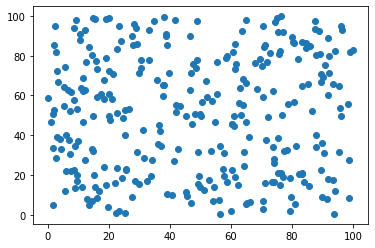

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

#### Crear los arrays xpos, ypos usando np.random.uniform() que representan las coordinadas (xpos,ypos) de las N personas
#### Pueden elegir los valores límite considerando que las N personas deben quedarse adentro de la ciudad
xpos = np.random.uniform(0,D,N)
ypos = np.random.uniform(0,D,N)

plt.scatter(xpos,ypos) #Plot para visualizar las personas

###Ciudad circular distribución uniforme

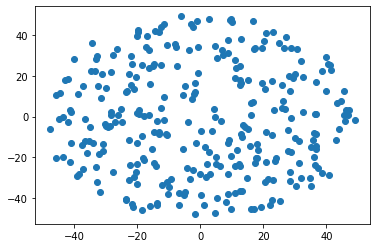

In [ ]:
import math
R = D/2 #radio de la distribución

### Generar N valores aleatorios entre 0 y 1 con la función np.random.uniform() y multiplicarlos por 2*math.pi
### para generar valores aleatorios de ángulos entre 0 y 2*Pi
alpha = np.random.uniform(0,1,N)*2*math.pi
### Generar N valores del radio r como R*np.sqrt(d), donde d son N aleatorios entre 0 y 1 generados con np.random.uniform()
### Se usa la raíz cuadrada para generar una distribución circular uniforme, si no saldría una distribución con aros concéntricos.
d = np.random.uniform(0,1,N)
r = R*np.sqrt(d)

### Convertir de coordenadas polares a cartesianas para generar las posiciones (xpos, ypos) de las N personas
xpos = r * np.cos(alpha)
ypos = r * np.sin(alpha)
plt.scatter(xpos,ypos)

###Ciudad cuadrada distribución en cluster


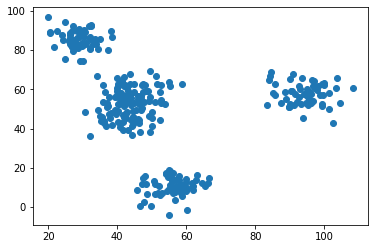

In [ ]:
import math

n_clusters = 5 #Para seleccionar el número de clusters
nn = N // n_clusters

### Usando np.random.uniform() generar las coordenadas de centro (x0,y0) de cada cluster (en número igual a n_clusters)
### Usar como límites los límites de la ciudad
x0 = np.random.uniform(0,D,n_clusters)
y0 = np.random.uniform(0,D,n_clusters)

###Aquí abajo se crean los arrays vacíos para las posiciones (xpos,ypos) de las N personas
xpos = np.zeros((n_clusters,nn))
ypos = np.zeros((n_clusters,nn))

### Por cada cluster (índice i),generar nn valores aleatorios xpos con distribución normal, usando np.random.normal(), 
### que tenga media igual a x0[i] y desviación estándar igual a D/20. Generar nn valores aleatorios ypos con distribución normal, usando np.random.normal(), 
### que tenga media igual a y0[i] y desviación estándar igual a D/20.
for i in range(n_clusters):
  xpos[i] = np.random.normal(x0[i],D/20,nn)
  ypos[i] = np.random.normal(y0[i],D/20,nn)

##En las líneas abajo se unen todos los xpos[i] y ypos[i] para crear un único array de xpos y ypos
xpos = np.reshape(xpos,(xpos.shape[0]*xpos.shape[1],))
ypos = np.reshape(ypos,(ypos.shape[0]*ypos.shape[1],))

plt.scatter(xpos,ypos)

###Ciudad circular distribución en cluster

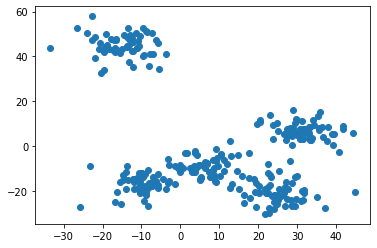

In [ ]:
import math
n_clusters = 5 #Para seleccionar el número de clusters
nn = N // n_clusters

R = D/2
##Generar aleatorios con distribución uniforme entre 0 y 1 (en número igual a n_clusters) 
##para el ángulo de cada cluster usando np.random.uniform() y multiplicándolo por 2*math.pi
alpha = np.random.uniform(0,1,n_clusters)*2*math.pi

### Generar los radios r como R*np.sqrt(d), donde d son aleatorios con distribución uniforme (en número igual a n_clusters) entre 0 y 1
###Se usa la raíz cuadrada para generar una distribución circular uniforme, si no saldría una distribución con aros concéntricos.
r = R * np.sqrt(np.random.uniform(0,1,n_clusters))

### Calcular las posiciones del centro de cada clusters convirtiendo de coordenadas polares a cartesianas
x0 = r * np.cos(alpha)
y0 = r * np.sin(alpha)
### Se crean arrays para las posiciones
xpos = np.zeros((n_clusters,nn))
ypos = np.zeros((n_clusters,nn))

### Por cada cluster (índice i),generar nn valores aleatorios xpos con distribución normal, usando np.random.normal(), 
### que tenga media igual a x0[i] y desviación estándar igual a D/20. Generar nn valores aleatorios ypos con distribución normal, usando np.random.normal(), 
### que tenga media igual a y0[i] y desviación estándar igual a D/20.
for i in range(n_clusters):
  xpos[i] = np.random.normal(x0[i],D/20,nn)
  ypos[i] = np.random.normal(y0[i],D/20,nn)
###En las líneas abajo se unen todos los xpos[i] y ypos[i] para crear un único array de xpos y ypos
xpos = np.reshape(xpos,(xpos.shape[0]*xpos.shape[1],))
ypos = np.reshape(ypos,(ypos.shape[0]*ypos.shape[1],))

plt.scatter(xpos,ypos)

In [ ]:
#Definimos la condición (status) de las personas como "susceptible", "infected","recovered","dead" 


#Condiciones iniciales:
I0  = 2 #número infectados inicial
R0 = 1 #número recuperados inicial
D0 = 1 #número muertos inicial
S0 = N-I0-D0-R0 #Número de susceptibles inicial

infection_radius = 0.6  #distancia para decidir si una persona se infecta o no
recovery_rate = 0.0006
death_rate = 0.001

### Definir un array donde aparezca un número de elementos "susceptible" igual a S0, un número de elementos "infected" igual a I0,
### un número de elementos "recovered" igual a R0 y un número de elementos "dead" igual a D0
## Sug.:usar np.repeat()

a = ["susceptible","infectados","recuperados","fallecidos"]
status = np.repeat(a,[S0,I0,R0,D0])

### Crear un array de N elementos iguales a 0 (usar np.repeat())
iteration = np.repeat(0,N)
### Crear un array de N elementos que contenga valores de 1 a N
id = np.linspace(1,N,N)


In [ ]:
## Aquí se crea un dataframe con las columnas 'xpos', 'ypos', 'status','iteration' y 'id'
df = pd.DataFrame()
df['xpos']=xpos
df['ypos']=ypos
df['status']=status
df['status'] = df['status'].astype('category')
df['iteration']=iteration
df['id']=id

In [ ]:
## Escribir una función que mide la distancia euclidiana entre dos puntos A=(x1,y1) y B=(x2,y2) y 
###regresa True si la distancia es menor que el radio de infección "infection_radius" definido arriba

def infec(A,B,infection_radius):
  distancia = math.sqrt(((A[0]-B[0])**2)+((A[1]-B[1])**2))
  return distancia < infection_radius

# A = (0,0)
# B = (1,0)
# infec(A,B,2)

Bucle con iteraciones

In [ ]:
dd = D0
n_iter = 100



https://plotly.com/python/discrete-color/

# Fase 4

In [ ]:
import numpy as np
for i in range(30):
  desplazamiento_X = np.random.normal(0,1,N)*0.5
  desplazamiento_Y = np.random.normal(0,1,N)*0.5

### Punto dos

In [ ]:
# print(xpos[20])
xpos = xpos + desplazamiento_X
ypos = ypos + desplazamiento_Y
# print(xpos[20])

### Punto 3

In [ ]:
df_iteracion_siguiente = pd.DataFrame()
df_iteracion_siguiente['xpos'] = xpos
df_iteracion_siguiente['ypos'] = ypos
df_iteracion_siguiente['status'] = status
df_iteracion_siguiente['status'] = df['status'].astype('category')
df_iteracion_siguiente['iteration'] = iteration
df_iteracion_siguiente['id'] = id

df_iteracion_siguiente.head()

xpos       ypos       status  iteration   id
0 -19.798180  44.277518  susceptible          0  1.0
1 -22.322369  47.575221  susceptible          0  2.0
2 -10.918817  44.324280  susceptible          0  3.0
3  -9.712169  52.904111  susceptible          0  4.0
4 -32.898919  44.133074  susceptible          0  5.0

In [ ]:
df.head()

xpos       ypos       status  iteration   id
0 -19.316898  44.153785  susceptible          0  1.0
1 -22.704953  47.471935  susceptible          0  2.0
2 -11.040794  43.838761  susceptible          0  3.0
3  -9.515988  52.454497  susceptible          0  4.0
4 -33.385191  43.793963  susceptible          0  5.0

### Punto 4

In [ ]:
df_iteracion_siguiente['status'].value_counts() 

susceptible    296
infectados       2
recuperados      1
fallecidos       1
Name: status, dtype: int64

In [ ]:
df_iteracion_siguiente[df_iteracion_siguiente.status == 'infectados']

xpos       ypos      status  iteration     id
296  26.375704 -21.178376  infectados          0  297.0
297  19.024310 -20.547116  infectados          0  298.0

In [ ]:
import numpy as np
import random
dfinal=df.assign(num_aleatorio = None)
dfinal2 = dfinal.assign(tam = 5)
last_pd = dfinal2
new2_df=df
for i in range(365):
  desplazamiento_X = np.random.normal(0,1,N)*0.5
  desplazamiento_Y = np.random.normal(0,1,N)*0.5
  xpos = xpos + desplazamiento_X
  ypos = ypos + desplazamiento_Y
  df_iteracion_siguiente = pd.DataFrame()
  df_iteracion_siguiente['xpos'] = xpos
  df_iteracion_siguiente['ypos'] = ypos
  df_iteracion_siguiente['status'] = new2_df['status']
  df_iteracion_siguiente['status'] = new2_df['status'].astype('category')
  df_iteracion_siguiente['iteration'] = iteration
  df_iteracion_siguiente['id'] = id
  ##########
  pi=[]
  for j in range(N):
    if df_iteracion_siguiente.iloc[j,2] == "infectados":
      pi.append(j)
  #infection_radius=5   
  for x in range(N): 
    for k in range(len(pi)):
      B = [df_iteracion_siguiente.xpos[x],df_iteracion_siguiente.ypos[x]]
      A = [df_iteracion_siguiente.xpos[pi[k]],df_iteracion_siguiente.ypos[pi[k]]]

      detector = infec(A,B,infection_radius)

      if detector and df_iteracion_siguiente.iloc[x,2] == "susceptible":
        df_iteracion_siguiente.iloc[x,2] = "infectados"
  ####
  new_df = df_iteracion_siguiente.assign(num_aleatorio = None)
  for l in range(N):
    if new_df["status"][l] == "infectados":
      new_df.iloc[l,5] = random.random()
  #recovery_rate = .3
  for o in range(N):
    if new_df["status"][o] == "infectados" and new_df["num_aleatorio"][o] < recovery_rate:
      new_df.iloc[o,2] = "recuperados"
  #print(new_df['status'].value_counts(),i)
  new2_df = new_df.assign(iteration = i+1)
  new2_df = new2_df.assign(tam = 5)
  last_pd = pd.concat([last_pd, new2_df])

In [ ]:
last_pd.tail()

xpos       ypos       status  iteration     id num_aleatorio  tam
295  23.423389 -18.060917   infectados        365  296.0      0.363276    5
296  26.051594 -15.140013   infectados        365  297.0      0.193662    5
297   2.796757 -17.902017   infectados        365  298.0      0.364371    5
298  29.274375 -25.301765  recuperados        365  299.0          None    5
299  26.343794  -6.079290   fallecidos        365  300.0          None    5

In [ ]:
import plotly.express as px
px.scatter(last_pd, x="xpos", y="ypos", animation_frame="iteration", 
           size='tam',color="status", hover_name="status",
           log_x=False, size_max=10, range_x=[-D,D], range_y=[-D,D])